Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **03Feb2019**

# 02d. Nuclear Data and Data Processing: Gamma Capture Cross Sections 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Atom sizes](#atom)
* [Nuclei relative sizes](#nuclei)
* [Radiative capture $(n,\gamma)$ cross section example](#xs1)

---

## Objectives<a id="obj"></a>
+ Demonstrate how to obtain traceable nuclear data and have them available through the notebook for analysis and problem solving.
+ Develop an intuitive sense of spatial scale of the underlying atomic world.
+ Develop an intuitive sense for the various (interaction) reactive cross sections in nuclear data in relation to the geometric cross section of the nuclei.

## Introduction<a id="intro"></a>

Refer to Notebook 02.

## Atom sizes (van der Walls radius)<a id="atom"></a>
Collect the **van der Walls radius** of all atoms of interest. Use data directly from a periodic table package: [Mendeleev](https://pypi.org/project/mendeleev/) python package.

In [1]:
'''Function to build a list of atomic properties'''

def get_atoms(z_max=117):
    '''
    Build a list of atomic properties for all atoms of interest up to `z_max`.
    Use the `mendeleev` package.

    Parameters
    ----------
    z_max: int, optional
        Maximum Z number; default = 117.
    
    Returns
    -------
    atoms: list(namedtuple)
        List of namedtuples with names: name, Z, symbol, vdw_radius.

    Examples
    --------
    '''
    
    # Use the Mendeleev python package (periodic table of elements)
    from mendeleev import element

    from collections import namedtuple
    Atom = namedtuple('Atom', ['name','Z','symbol','vdw_radius'])

    atoms = list()
    z_max = 96  # up to Curium

    for i in range(z_max):
        el = element(i+1)
        #print('%20s vdw radius [pm] = %3.1f'%(e.name,round(e.vdw_radius,1)))
        atm = Atom( name=el.name, Z=el.atomic_number, symbol=el.symbol, vdw_radius=el.vdw_radius )
        atoms.append( atm )
    #van_der_waals_radii
    
    return atoms

In [2]:
'''Get a list of atoms Z <= 96 (Cm)'''

atoms = get_atoms(96)

In [3]:
'''Plot the van der Walls radii for all elements of interest'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
(fig, ax) = plt.subplots(figsize=(18,6))

ax.plot(range(len(atoms)), [atm.vdw_radius for atm in atoms], 
        '-.',color='black', marker='*',markersize=12)

plt.xticks(range(0,len(atoms),2),[atm.symbol for atm in atoms][::2],rotation=0,fontsize=12)
ax.set_ylabel('vdW radius [pm]',fontsize=16)
ax.set_xlabel('Element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)

# create a twin y axis to reconfigure the top x axis
ay1 = ax.twiny()
ay1.set_xlim(ax.get_xlim())
#ay1.xaxis.tick_top()
ay1.set_xticks([])
ay1.set_xticks(range(1,len(atoms),2),[atm.symbol for atm in atoms][1::2])
ay1.set_xticklabels([atm.symbol for atm in atoms][1::2],minor=True,fontsize=12)
#ax1.spines["top"].set_position(("axes", 2))

plt.show()

<Figure size 1800x600 with 2 Axes>

## Nuclei relative sizes<a id="nuclei"></a>
Let's compute the sizes of nuclei relative to the atom they are in.
Using the [IAEA search engine](https://www-nds.iaea.org/relnsd/NdsEnsdf/QueryForm.html), 
+ expand the `More fields` of the `NUCLIDE Ground State` section, 
+ set the `Z range` to 1, 96
+ check the nuclear radius `R` button
+ click on the `Search` button
+ wait for the results window to appear (list of 3001 nuclides)
+ check the `You requested:` line to be ` 1 ≤ Z ≤96    ≤ R ≤   `
+ click on the `CSV` download button to save a table file
+ rename the file to `nuclides-z1-to-z96.csv`.

In [4]:
'''View the raw data'''
!cat data/nuclides-z1-to-z96.csv

Z,N,symb,radius, unc, energy, unc, jp, half-life operator, half_life, unc,unit, half_life [s], unc, decay, decay %, unc, decay, decay %, unc, decay, decay %, unc,isospin,magn. dipole, unc, elect. quad , unc,Qb-,unc,Qb- n,unc,Qa, unc, Qec, unc,Sn,unc, Sp,unc,Binding/A,unc,atomic mass, unc, mass excess,unc,
1,0,H,0.8783,86,0, ,1/2+, ,STABLE, , , , , , , , , , , , , , ,2.792847351, , , ,,,,,,,-782.347,0,,,0.0,0,0,0,1007825.03224,9,7288.97061,9,
1,1,H,2.1421,88,0, ,1+, ,STABLE, , , , , , , , , , , , , , ,0.85743823, ,0.00286, ,,,,,,,,,2224.57,0,2224.57,0,1112.283,0,2014101.77811,12,13135.72176,11,
1,2,H,1.7591,363,0, ,1/2+, ,12.32,2,Y,388781328.00697345, ,B-,100, , , , , , , , ,2.978962467, , , ,18.592,0,,,,,,,6257.23,0,,,2827.265,0,3016049.28199,23,14949.80993,22,
1,3,H,,,0, ,2-, , , , , , ,N,100, , , , , , , ,1, , , , ,22196.211,100000,1618.59,100,,,,,-1600.00,100,,,1720.449,25000,4026431.868,107354,24621.127,100000,
1,4,H,,,0, , , , , , , , ,N,100, , , , , , , , , , , , ,21661.211,91652

34,37,Se,,,0, ,(5/2-), ,4.74,5,m,284.40000000000003, ,EC+B+,100, , , , , , , , , , , , ,-6644.089,6082,-19792.20,15,-2913.19,5,4746.59,5,9287.93,3,6093.60,50,8586.06,39,70932209.432,3000,-63146.507,2794,
34,38,Se,,,0, ,0+, ,8.40,8,d,725760, ,EC,100, , , , , , , , , , , , ,-8806.437,2208,-19437.08,6,-3314.31,271,361.618,5,12792.99,3,7264.05,5,8644.489,27,71927140.507,2100,-67868.180,1956,
34,39,Se,,,0, ,9/2+, ,7.15,8,h,25740, ,EC+B+,100, , , , , , , , ,0.87, , , ,-4579.912,10388,-17236.96,7,-3551.64,8,2725.36,8,8430.52,8,7286.56,8,8641.558,102,72926754.883,7969,-68227.387,7424,
34,40,Se,4.0700,200,0, ,0+, ,STABLE, , , , , , , , , , , , , , , , , , ,-6925.049,5835,-16637.04,7,-4076.24,84,-1353.147,1693,12057.13,7,8549.43,4,8687.715,0,73922475.935,15,-72213.201,15,
34,41,Se,,,0, ,5/2+, ,119.78,5,d,10348992, ,EC,100, , , , , , , , ,0.683, ,1.1, ,-3062.472,4285,-14952.65,6,-4687.9,84,864.714,887,8027.60,7,8598.40,169,8678.913,1,74922522.871,78,-72169.481,73,
34,42,Se,4.1395,16,0, ,0+, ,STAB

77,117,Ir,,,0, ,1-, ,19.28,13,h,69408, ,B-,100, , , , , , , , ,0.39, ,0.339, ,2228.362,1257,-6123.42,32,679.21,71,-96.6,27,6066.79,11,6426.39,240,7928.487,7,193965075.773,1430,-32531.708,1332,
77,118,Ir,,,0, ,3/2+, ,2.29,17,h,8244, ,B-,100, , , , , , , , , , , , ,1101.598,1264,-5003.50,126,233.13,10,-2180.658,56,7231.86,6,6546.11,200,7924.915,7,194965976.967,1431,-31692.251,1333,
77,119,Ir,,,0, ,(0-), ,52,1,s,52, ,B-,100, , , , , , , , , , , , ,3209.016,38411,-4712.96,38,-271.58,81,-1158.388,55,5814.56,38,7212.87,68,7914.148,196,195968399.696,41239,-29435.493,38414,
77,120,Ir,,,0, ,3/2+, ,5.8,5,m,348, ,B-,100, , , , , , , , , , , , ,2155.645,20106,-3690.91,20,-457.38,44,-2955.105,197,6899.93,43,7275.97,45,7908.999,102,196969657.233,21588,-28264.105,20110,
77,121,Ir,,,0, , , ,8,1,s,8, ,B-,100, , , , , , , , , , , , ,4083,196,-3473,196,-1009,277,-1984.0,277,5628,197,7801,277,7897,1,197972280,210,-25821,196,
77,122,Ir,,,0, , , ,6,+5-4,s,6, ,B-, , , , , , , , , , , , , ,2990.167,41003,-256

In [5]:
'''Function to read the CSV data'''
def read_csv(file_name):
    '''
    Read csv data into a `pandas` data frame (table).
    
    Parameters
    ----------
    file_name: str, required
        File name and its path relative to this notebook.
    
    Returns
    -------
    df: pandas.df
        `Pandas` data frame (table).

    Examples
    --------
    '''
    import pandas as pd

    # read the data into a data frame (or table)
    df = pd.read_csv(file_name)

    #print(df) # uncomment for a screen output of the data

    # plot the data directly from Pandas (quick check)
    ax = df.plot(x='Z', y='radius',legend=False,
             title='Nuclides Radii', fontsize=14, figsize=(18,6))
    ax.set_ylabel('$r$ [fm]',fontsize=16)
    ax.set_xlabel('Z',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.grid()
    
    return df

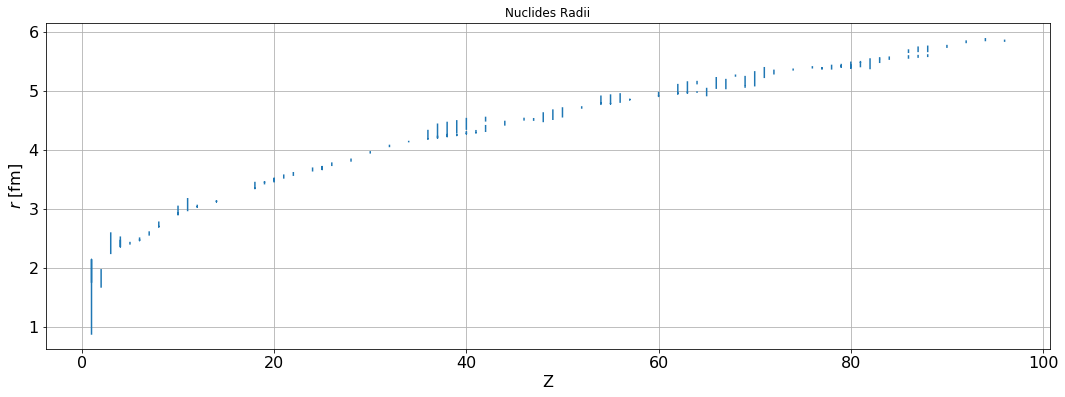

In [6]:
'''Import the data as a Pandas table'''
df = read_csv('data/nuclides-z1-to-z96.csv')

<span style="color:red">
**NB:** for all nuclides of interest the sizes vary by a maximum factor of 6 when the Z number vary from 1 to 96.
</span>

Let's collect the important size data for all nuclides.

In [12]:
'''Function for creating a nuclide container'''
def get_nuclides( df ):
    '''
    Create a list of named tuple nuclides
    Parameters
    ----------
    df: pandas data frame, required
        Table of data for nuclides.
    
    Returns
    -------
    nuclides: list(namedtuple)
        List of namedtuples. Names: name, Z, A, radius, unc.

    Examples
    --------
    '''
    
    nuclides = list()

    # design a container data structure
    from collections import namedtuple
    Nuclide = namedtuple('Nuclide', ['name','Z','A','radius','unc'])

    # fill in the list of containers
    radius_misses = 0 # counter of nuclides without radius data
    a_max = 0 # maximum A number with radius data present
    z_max = 0 # maximum Z number with radius data present

    import pandas as pd
    
    for row in df.itertuples():
        # note row[0] is the index
        if pd.isnull(row[4]):
            radius_misses += 1
            continue
        z = row[1]
        n = row[2]
        a = z+n
        a_max = max(a,a_max)
        z_max = max(z,z_max)
        symbol = row[3]
        nuc = Nuclide( name=row[3]+'-'+str(z+n), Z=z, A=a, radius=row[4], unc=int(row[5]) )
        
        nuclides.append(nuc)

    print('Number of nuclides with    radius data = ',len(nuclides))
    print('Number of nuclides without radius data = ',radius_misses)
    print('')
    print('Max Z number with radius data = ',z_max)
    print('Max A number with radius data = ',a_max)
    
    return (nuclides, z_max, a_max)

In [13]:
'''Create a list of nuclides'''

(nuclides, z_max, a_max) = get_nuclides( df )

Number of nuclides with    radius data =  908
Number of nuclides without radius data =  2146

Max Z number with radius data =  96
Max A number with radius data =  248


Let's calculate and plot the geometric cross sectional area of the nuclei.

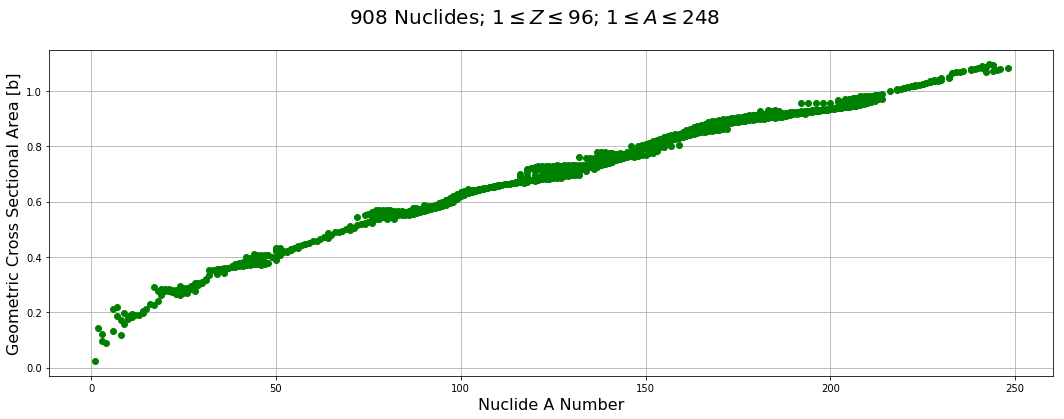

In [14]:
'''Plot the van der Walls radii for all elements of interest'''
import math

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(18,6))

# plot the cross sectional area of the nuclei; 1 barn = 100 fm^2
ax.plot([nc.A for nc in nuclides], [math.pi*nc.radius**2/100 for nc in nuclides], 
        ' ',color='green', marker='.',markersize=12)

ax.set_ylabel('Geometric Cross Sectional Area [b]',fontsize=16)
ax.set_xlabel('Nuclide A Number',fontsize=16)

fig.suptitle(r'%i Nuclides; $1 \leq Z \leq %i$; $1 \leq A \leq %i$ '%(len(nuclides),z_max,a_max),fontsize=20)
ax.grid()
plt.show()

<span style="color:red">
**NB:** for all nuclides of interest the geometric cross sectional area vary to a **maximum of ~1.1 b** when the number of nucleons vary from 1 to 248.
</span>
Also, the area does not vary significantly for a given value of A as a function of isotopes.

If an atom is the size of a classroom, say 10 m in diameter, what would the corresponding values of the nuclei be?

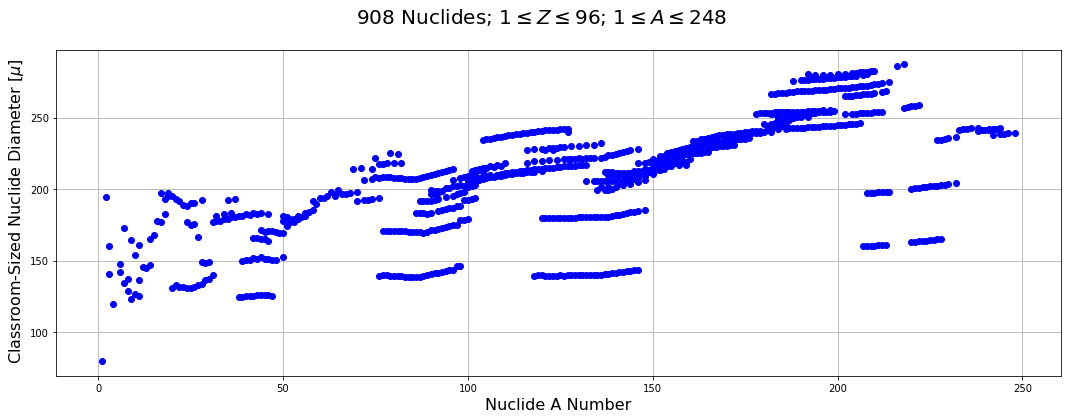

In [15]:
'''Plot the classroom size nuclei diameter'''
import math

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(18,6))

# plot the classroom-sized atom nuclide diameter for a classroom of 10-m diameter
ax.plot([nc.A for nc in nuclides], [2*nc.radius*1e-15 * 5.0/atoms[nc.Z-1].vdw_radius*1e+12 * 1e+6 for nc in nuclides], 
        ' ',color='blue', marker='.',markersize=12)

ax.set_ylabel(' Classroom-Sized Nuclide Diameter [$\mu~m$]',fontsize=16)
ax.set_xlabel('Nuclide A Number',fontsize=16)

fig.suptitle(r'%i Nuclides; $1 \leq Z \leq %i$; $1 \leq A \leq %i$ '%(len(nuclides),z_max,a_max),fontsize=20)
ax.grid()
plt.show()

<span style="color:red">
**NB:** for all nuclides of interest the classroom sizes vary between 100 and 300 micrometers.
</span>

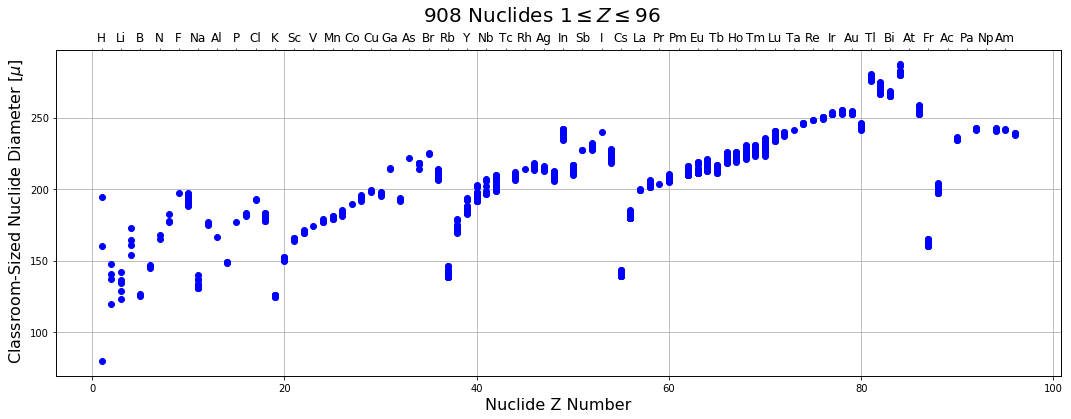

In [16]:
'''Plot the classroom size nuclei diameter'''
import math

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
fig, ax = plt.subplots(figsize=(18,6))

ax.plot([nc.Z for nc in nuclides], [2*nc.radius*1e-15 * 5.0/atoms[nc.Z-1].vdw_radius*1e+12 * 1e+6 for nc in nuclides], 
        ' ',color='blue', marker='.',markersize=12)

#plt.xticks(range(0,len([nc.Z for nc in nuclides]),2),[nc.Z for nc in nuclides][::2],rotation=0,fontsize=12)
ax.set_ylabel(' Classroom-Sized Nuclide Diameter [$\mu~m$]',fontsize=16)
ax.set_xlabel('Nuclide Z Number',fontsize=16)

# create a twin y axis to reconfigure the top x axis
ay1 = ax.twiny()
ay1.set_xlim(ax.get_xlim())
#ay1.xaxis.tick_top()
ay1.set_xticks([])
ay1.set_xticks(range(1,len(atoms),2),[atm.symbol for atm in atoms][::2])
ay1.set_xticklabels([atm.symbol for atm in atoms][::2],minor=True,fontsize=12)
#ax1.spines["top"].set_position(("axes", 2))

fig.suptitle(r'%i Nuclides $1 \leq Z \leq 96$'%(len(nuclides)),fontsize=20)
ax.grid()
plt.show()

<span style="color:red">
**NB:** for all nuclides of interest the classroom sizes vary between 100 and 300 micrometers.
</span>

## Radiative capture $(n,\gamma)$ cross section  example<a id="xs1"></a>
This is a significant capture reaction emitting a prompt *capture* gamma ray (photon)

\begin{equation*}
^1_0\text{n} \ + \  ^{235}_{92}\text{U} \longrightarrow \ ^{236}_{92}\text{U}^* \overset{\approx 10^{-14}\,\text{s}}{\longrightarrow} \ ^{236}_{92}\text{U} \ + \ \gamma    ,
\end{equation*}

Note: 
+ a) over much of the neutron energy range in a nuclear reactor, this is the only possible parasitic reaction that influences neutron balance; neutrons of any energy can be captured with gamma emission.
+ b) often this reaction is the dominat source of radiation heating and bulk shielding in the reactor vessel.
+ c) the product nuclide is often unstable, decaying via beta emission and delayed gamma rays; the latter continues for years after reactor shutdown.

The *microscopic cross section* of this neutron interaction with the nuclide $^{235}_{92}\text{U}$ represents the probability of interaction measured in units of area; typical units are: cm$^2\times 10^{-24}$ or barn. Therefore it makes sense to compare against the geometric cross sectional area of the nuclide.

Acquiring cross section data and saving it to a file:

 + Using the [cross section data site](https://www.nndc.bnl.gov/sigma/index.jsp) click on U in the periodic table and choose $^{235}_{92}$U from the isotope list. 
 + Select the neutron capture reaction cross section $^{235}_{92}$U(n,$\gamma$) and plot the data. 
 + Choose `view evaluated data` and click on the `Text` link to view the data in a two-column arrangement (energy versus cross section). 
 + Using the browser, save data to a text file (`u-235-sigma-c.dat`). Relocate the file in a directory `data/` relative to this notebook.

In [17]:
'''View the raw data'''
!cat data/u-235-sigma-g.dat

# NNDC Sun Feb  3 21:44:00 EST 2019
# 92-U-235(n,&gamma;) ENDF/B-VII.1
# E [ev], sigma [barn]
1.0E-5,5964.31
1.31241E-5,5206.18
1.70876E-5,4562.52
2.2426E-5,3982.53
2.91987E-5,3490.13
3.83206E-5,3046.38
4.98935E-5,2669.64
6.54808E-5,2330.16
8.52562E-5,2041.91
1.11891E-4,1782.16
1.45682E-4,1561.63
1.91195E-4,1362.84
2.48937E-4,1194.04
3.26707E-4,1041.92
4.25373E-4,912.718
5.58264E-4,796.275
7.26861E-4,697.322
9.53941E-4,608.11
0.00124203,532.26
0.00163006,463.783
0.00212234,405.508
0.00278538,352.713
0.00362657,307.469
0.00497149,260.065
0.00680278,219.194
0.0092902,183.75
0.012142,156.914
0.0158747,133.053
0.0207477,112.236
0.024383,101.153
0.0253,98.7947
0.033204,83.1612
0.041464,71.8748
0.0516848,62.345
0.0648112,54.0549
0.0847058,45.9847
0.105586,40.7469
0.126231,37.5711
0.150913,35.6755
0.167021,35.4091
0.191514,36.4355
0.224514,40.4931
0.260652,45.9367
0.2733,46.5478
0.288577,45.4678
0.310342,40.6585
0.354694,27.5103
0.378513,22.167
0.403666,18.1174
0.430872,15.0768
0.458592,12.91

563.269,1.47562
563.281,1.47477
563.369,1.53826
563.462,1.71734
563.607,2.13749
563.894,3.04012
564.15,3.58919
564.499,4.0504
564.652,4.11754
564.833,3.94676
565.103,3.35408
565.205,3.24044
565.308,3.29913
565.431,3.61983
565.736,4.87626
565.875,5.10878
565.887,5.10969
566.018,4.92449
566.2,4.22611
566.448,3.09624
566.603,2.58429
566.733,2.32498
566.828,2.2273
567.228,2.11614
567.422,1.8964
567.598,1.66707
567.714,1.60849
567.804,1.65637
567.904,1.82038
568.023,2.16516
568.208,2.92076
568.446,3.92196
568.613,4.36186
568.728,4.45815
568.895,4.28622
569.169,3.51745
569.368,3.0132
569.529,2.81446
569.678,2.77483
569.944,2.8685
570.09,3.09051
570.208,3.49556
570.317,4.11611
570.457,5.24976
570.691,7.37391
570.826,8.12363
570.904,8.25271
571.032,7.93292
571.209,6.72132
571.362,5.60325
571.432,5.29802
571.502,5.22276
571.572,5.44695
571.633,5.93838
571.694,6.72856
571.767,8.12486
571.856,10.4916
571.972,14.5409
572.209,23.8919
572.327,27.2703
572.448,28.7942
572.468,28.8355
572.582,28.0339
5

Importing and processing tabular data is readily done using the Pandas Python Package:
 + [Pandas documentation](https://pandas.pydata.org/).

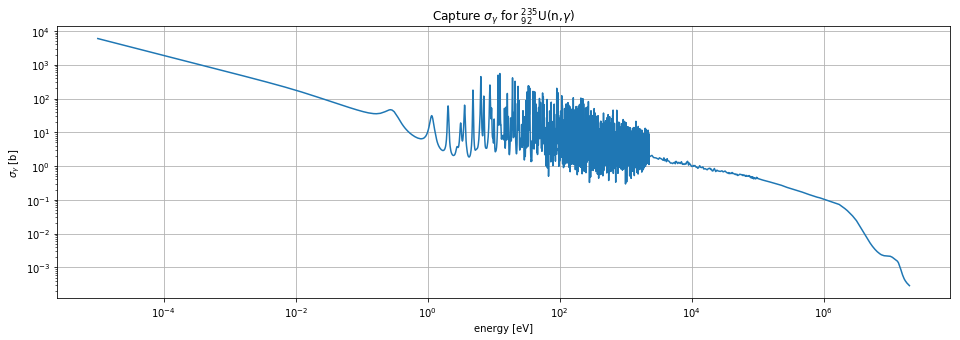

In [18]:
'''Visualize the data'''

# Pandas: python package for tabular data analysis
import pandas as pd

# read the data into a data frame (or table)
df = pd.read_csv('data/u-235-sigma-g.dat', 
                  names=['energy [eV]','sigma_g [b]'], 
                  skiprows=3)

#print(df) # uncomment for a screen output of the data

# plot the data directly from Pandas
ax = df.plot(loglog=True, x='energy [eV]', y='sigma_g [b]',legend=False,
             title='Capture $\sigma_\gamma$ for $^{235}_{92}$U(n,$\gamma$)', figsize=(16,5))
ax.set(ylabel='$\sigma_\gamma$ [b]')
ax.grid()

To obtain a *sense* of how significant this reaction is, calculate the cross sectional area of the nucleus and compare with the radiative cross section in the plot.

In [19]:
for nc in nuclides:
    if nc.name == 'U-235':
        r_u235 = nc.radius
        r_u235_unc = nc.unc
print('U-235 r [fm] = ',r_u235,r_u235_unc)

U-235 r [fm] =  5.8337 41


In [20]:
import math
area = math.pi * r_u235**2
print('nucleus geometric cross section area [b] = %5.5f'%(area/100)) # 1 barn = 100 fm^2

nucleus geometric cross section area [b] = 1.06915


From the radiative capture cross section data (plot): $\sigma_\gamma = 101.153$ b at $E=2.4\, 10^{-2}$ eV. Therefore the radiative cross section is

In [21]:
round(101.153/1.06915,1)

94.6

times greater than the nucleus geometric cross section. Note that $\sigma_\gamma\approx 1$ at $E\approx 10$ keV and this reaction is significant for a large extent of neutron energies.